In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


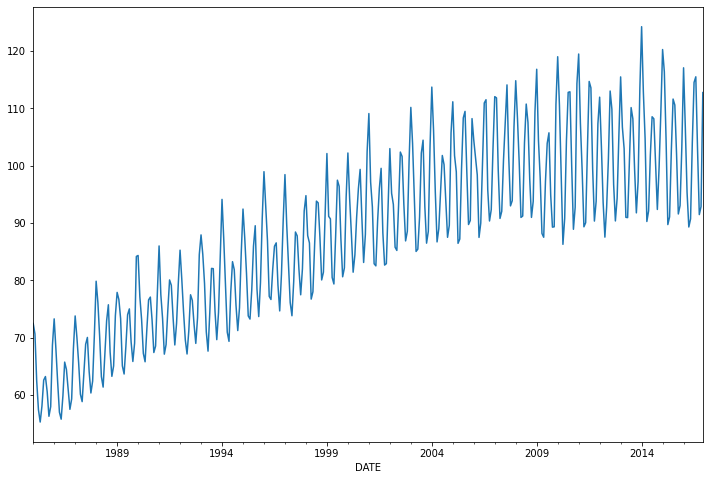

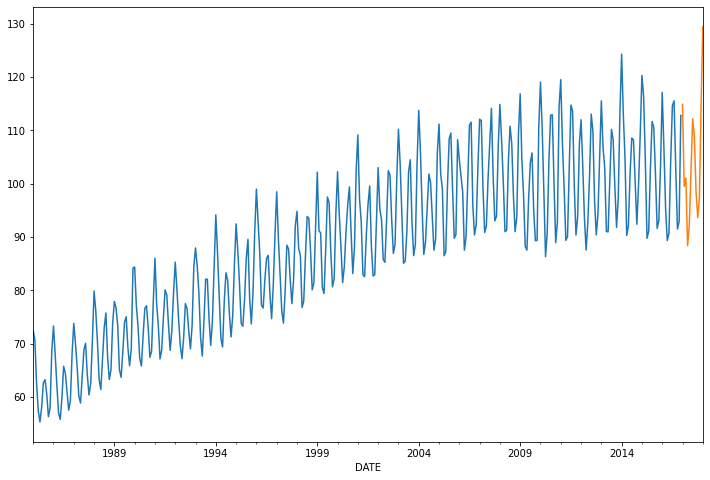

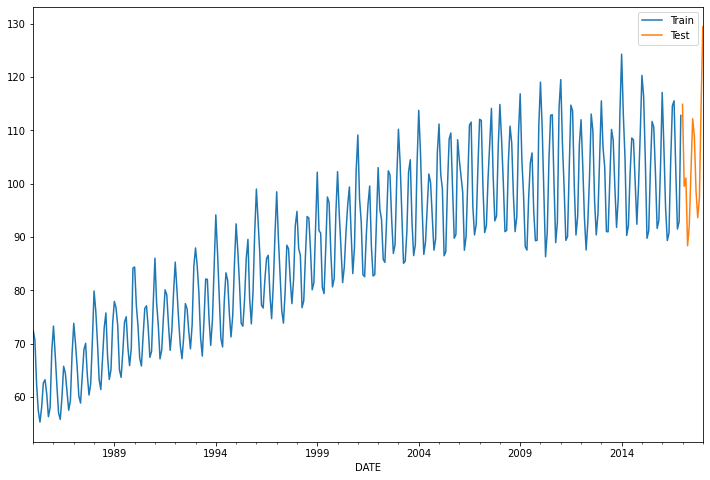

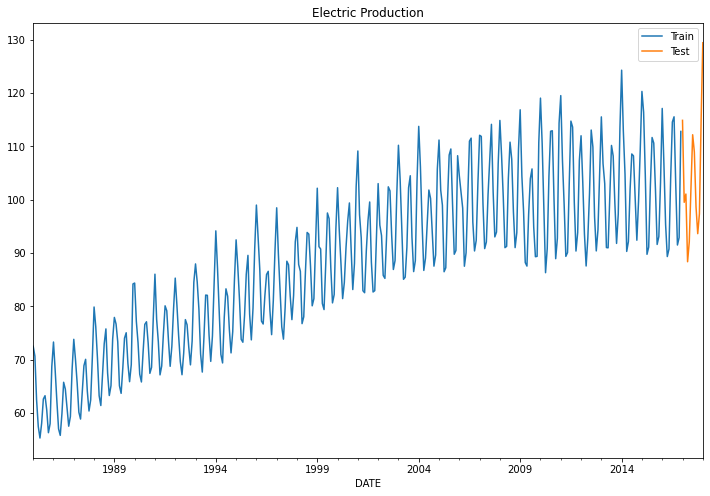

In [3]:
electric_production = pd.read_csv(r"D:\workspace\MachineLearning\Datasets\Datasets\Electric_Production.csv", index_col=0)
electric_production.head()

electric_production.index = pd.to_datetime(electric_production.index)

y = electric_production['IPG2211A2N']
y_train = y.iloc[:-13]
y_test = y.iloc[-13:]

y_train.plot(figsize=(12,8))
plt.show()

y_train.plot(figsize=(12,8))
y_test.plot()
plt.show()

y_train.plot(figsize=(12,8))
y_test.plot()
plt.legend(['Train', 'Test'])
plt.show()

y_train.plot(figsize=(12,8))
y_test.plot()
plt.legend(['Train', 'Test'])
plt.title('Electric Production')
plt.show()



C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


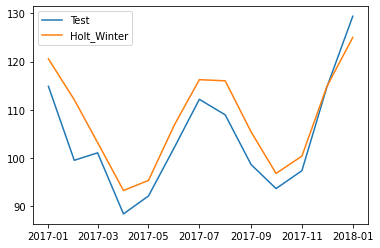

In [4]:
hw_add = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
fit1 = hw_add.fit(smoothing_level=0.2, smoothing_trend=0.2, smoothing_seasonal=0.2)
y_pred = fit1.forecast(len(y_test))
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Holt_Winter')
plt.legend()
plt.show()


In [5]:
alphas = np.linspace(0.01,0.9,10)
betas = np.linspace(0.01,0.9,10)
gammas = np.linspace(0.01,0.9,10)
scores = []

for i in tqdm(range(len(alphas))):
    for b in betas:
        for g in gammas:
            hw_add = ExponentialSmoothing(y_train, seasonal_periods=12,trend='add',seasonal='add')
            fit1 = hw_add.fit(smoothing_level=alphas[i], smoothing_trend=b,smoothing_seasonal=g)
            y_pred = fit1.forecast(len(y_test))
            scores.append([alphas[i], b,g,mean_squared_error(y_test,y_pred)])

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppDat

In [7]:
alphas = np.linspace(0.01,0.9,10)
beta = np.linspace(0.01,0.9,10)
gammas = np.linspace(0.01,0.9,10)
phis = np.linspace(0.01,0.9,10)
scores = []

for i in tqdm(range(len(alphas))):
    for b in betas:
        for g in gammas:
            for p in phis:
                hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add', damped_trend=True)
                fit1 = hw_add.fit(smoothing_level = alphas[i], smoothing_trend=b, smoothing_seasonal=g, damping_trend=p)
                y_pred = fit1.forecast(len(y_test))
                scores.append([alphas[i],b,g,p,mean_squared_error(y_test, y_pred)])

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppDat

#### Default(Auto-tuning)

In [8]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw_add.fit()
y_pred = fit1.forecast(len(y_test))
np.sqrt(mean_squared_error(y_test,y_pred))

C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


5.167577163162149

In [12]:
fit1.params

{'smoothing_level': 0.5612040480227402,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.1589392397367068,
 'damping_trend': 0.995,
 'initial_level': 59.113905563933045,
 'initial_trend': 0.22100881879188328,
 'initial_seasons': array([1.22258136, 1.16413313, 1.08930268, 1.0010388 , 0.98312987,
        1.04912637, 1.1202845 , 1.11180911, 1.01960758, 0.95519667,
        0.99169444, 1.13913717]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [9]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw_add.fit()
y_pred = fit1.forecast(len(y_test))
np.sqrt(mean_squared_error(y_test,y_pred))

C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


5.272969574833464

In [10]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add', damped_trend=True)
fit1 = hw_add.fit()
y_pred = fit1.forecast(len(y_test))
np.sqrt(mean_squared_error(y_test, y_pred))

C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


5.089428521771895

In [11]:
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True)
fit1 = hw_add.fit()
y_pred = fit1.forecast(len(y_test))
np.sqrt(mean_squared_error(y_test, y_pred))

C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


5.184313110995029